In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [2]:
fires= pd.read_csv('fires.csv')
fires

C:\Users\Enedis\AppData\Local\Temp\ipykernel_10880\955333285.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fires= pd.read_csv('fires.csv')


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,DATE,CONT_DATE_COR,CONT_DATE_COR_INT,DIFF_YEAR,DURATION,FIRE_SIZE_CLASS_TEST,MONTH,DAY,SPLIT_MONTH,SPLIT_DAY
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,PLUMAS NATIONAL FOREST,...,2005-02-02,2005-02-02,2005,0,0 days,A,February,Wednesday,2,2
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,ELDORADO NATIONAL FOREST,...,2004-05-12,2004-05-12,2004,0,0 days,A,May,Wednesday,5,12
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,ELDORADO NATIONAL FOREST,...,2004-05-31,2004-05-31,2004,0,0 days,A,May,Monday,5,31
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,ELDORADO NATIONAL FOREST,...,2004-06-28,2004-07-03,2004,0,5 days,A,June,Monday,6,28
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,ELDORADO NATIONAL FOREST,...,2004-06-28,2004-07-03,2004,0,5 days,A,June,Monday,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,SHASTA-TRINITY UNIT,...,2015-09-26,2015-09-26,2015,0,0 days,A,September,Saturday,9,26
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,TUOLUMNE-CALAVERAS UNIT,...,2015-10-05,NaN,0,-2015,NaN,A,October,Monday,10,5
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,TUOLUMNE-CALAVERAS UNIT,...,2015-05-02,NaN,0,-2015,NaN,A,May,Saturday,5,2
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,TUOLUMNE-CALAVERAS UNIT,...,2015-10-14,NaN,0,-2015,NaN,B,October,Wednesday,10,14


In [3]:
# Création d'un dataframe pour la modélisation. On enlève à notre dataset de départ (fires) les variables qu'on juge inutiles pour n'importe quelle modélisation. 
fires_model = fires
print(fires_model.info())

# Vérification des données nulles
print(fires_model.isna().sum())


# Nous supprimons les ID, les colonnes avec beaucoup de valeurs manquantes, les colonnes DIFF_YEAR, CONT_DATE_COR et FIRE_SIZE_CLASS_TEST qui ont été créées pour vérifier 
# la conformité des données. Nous supprimons également les colonnes inutiles.
# Nous allons conserver les variables suivantes :
fires_model = fires[['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS', 'STATE', 'MONTH', 'DAY', 'FIRE_YEAR', 'DISCOVERY_DAY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'SPLIT_MONTH', 
'SPLIT_DAY', 'DURATION']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [4]:
# Vérification des NaN
print(fires_model.isna().sum())

#Dimension du dataframe avant suppression des NaN
fires_model.shape  #(1880465, 13)

STAT_CAUSE_DESCR         0
FIRE_SIZE_CLASS          0
STATE                    0
MONTH                    0
DAY                      0
FIRE_YEAR                0
DISCOVERY_DAY            0
LATITUDE                 0
LONGITUDE                0
FIRE_SIZE                0
SPLIT_MONTH              0
SPLIT_DAY                0
DURATION            891531
dtype: int64


(1880465, 13)

In [8]:
# Suppression des NaN et de la colonne DURATION qui n'a pas de données fiables
fires_model = fires_model.dropna()
fires_model = fires_model.drop('DURATION', axis=1)

# Dimension du dataframe après suppression des NaN
print(f'La nouvelle dimension du dataframe est : {fires_model.shape}')

La nouvelle dimension du dataframe est : (988934, 12)


In [9]:
# Analyse du type de données afin de séparer les variables numériques et catégorielles
#fires_model.info()
fires_model.nunique()

STAT_CAUSE_DESCR        13
FIRE_SIZE_CLASS          7
STATE                   52
MONTH                   12
DAY                      7
FIRE_YEAR               24
DISCOVERY_DAY          366
LATITUDE            486735
LONGITUDE           558319
FIRE_SIZE            11960
SPLIT_MONTH             12
SPLIT_DAY               31
dtype: int64

In [16]:
# Variables catégorielles
cat_var = fires_model.select_dtypes(include=[object])
print(cat_var.shape)

# Variables numériques
num_var = fires_model.select_dtypes(include=[np.number])
print(num_var.shape)

# Vérification de la non perte de données
print(fires_model.shape)
print('Les dimensions sont conformes, aucune perte de données')

(988934, 5)
(988934, 7)
(988934, 12)
Les dimensions sont conformes, aucune perte de données


Variables catégorielles

In [17]:
# Etude des variables catégorielles
cat_var.nunique()

STAT_CAUSE_DESCR    13
FIRE_SIZE_CLASS      7
STATE               52
MONTH               12
DAY                  7
dtype: int64

In [18]:
# Regroupement de la variable catégorielle STAT_CAUSE_DESCR par type de cause et remplacement numérique

def change_cause(cat):
    cause = 0
    natural_cause = ['Lightning']
    accidental_cause = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    criminal_cause = ['Arson']
    other_cause = ['Missing/Undefined','Miscellaneous']
    if cat in natural_cause:
        cause = 1
    elif cat in accidental_cause:
        cause = 2
    elif cat in criminal_cause:
        cause = 3
    else:
        cause = 4
    return cause
     

cat_var['CAUSE'] = cat_var['STAT_CAUSE_DESCR'].apply(lambda x: change_cause(x))
cat_var = cat_var.drop('STAT_CAUSE_DESCR',axis=1)
cat_var.head()

,FIRE_SIZE_CLASS,STATE,MONTH,DAY,CAUSE
0,A,CA,February,Wednesday,4
1,A,CA,May,Wednesday,1
2,A,CA,May,Monday,2
3,A,CA,June,Monday,1
4,A,CA,June,Monday,1


In [19]:
# Remplacement numérique de la variable catégorielle MONTH 
# Encodage de la variable catégorielle MONTH => utilisation de LabelEncoder (les mois seront triés par ordre alphabétique lors de l'encodage)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_var['MONTH'] = le.fit_transform(cat_var['MONTH'])
cat_var['MONTH'].value_counts()

5     155698
1     136667
0     118417
7     103551
6      94456
8      88532
11     73940
3      61031
10     52044
9      44931
4      37230
2      22437
Name: MONTH, dtype: int64

In [20]:
# Encodage de la variable catégorielle FIRE_SIZE_CLASS
cat_var['FIRE_SIZE_CLASS'] = le.fit_transform(cat_var['FIRE_SIZE_CLASS'])
cat_var['FIRE_SIZE_CLASS'].value_counts()

1    429692
0    421865
2    103618
3     15720
4      9016
5      5802
6      3221
Name: FIRE_SIZE_CLASS, dtype: int64

In [21]:
# Suppression des états Alaska, Hawai et Puerto Rico pour avoir une care des USA
# Encodage de la variable catégorielle STATE => utilisation de LabelEncoder (les états seront triés par ordre alphabétique lors de l'encodage)
cat_var['STATE'] = le.fit_transform(cat_var['STATE'])
cat_var['STATE'].value_counts().head()

10    99240
4     91908
34    68949
3     66355
37    60751
Name: STATE, dtype: int64

In [22]:
# Encodage de la variable catégorielle DAY => utilisation de LabelEncoder (les jours seront triés par ordre alphabétique lors de l'encodage)
cat_var['DAY'] = le.fit_transform(cat_var['DAY'])
cat_var['DAY'].value_counts()

2    156183
3    148782
1    143156
0    136033
5    135800
6    135602
4    133378
Name: DAY, dtype: int64

In [23]:
# Reconstitution du DataFrame
fires_model = pd.concat([cat_var, num_var], axis=1)
fires_model

,FIRE_SIZE_CLASS,STATE,MONTH,DAY,CAUSE,FIRE_YEAR,DISCOVERY_DAY,LATITUDE,LONGITUDE,FIRE_SIZE,SPLIT_MONTH,SPLIT_DAY
0,0,4,3,6,4,2005,33,40.036944,-121.005833,0.10,2,2
1,0,4,8,6,1,2004,133,38.933056,-120.404444,0.25,5,12
2,0,4,8,1,2,2004,152,38.984167,-120.735556,0.10,5,31
3,0,4,6,1,1,2004,180,38.559167,-119.913333,0.10,6,28
4,0,4,6,1,1,2004,180,38.559167,-119.933056,0.10,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,1,4,6,3,4,2015,165,40.019907,-122.391398,2.22,6,14
1880457,1,4,11,6,3,2015,273,40.588583,-123.069617,1.00,9,30
1880458,1,4,1,2,1,2015,213,40.244833,-123.544167,4.00,8,1
1880459,1,4,8,4,4,2015,148,38.415608,-122.660044,0.50,5,28


Vérification outliers sur variables numériques

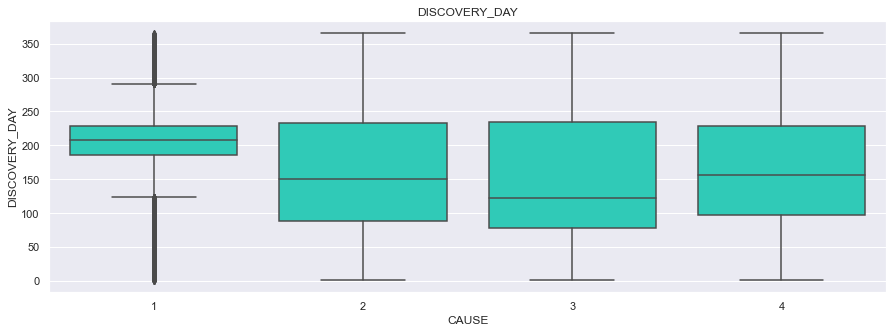

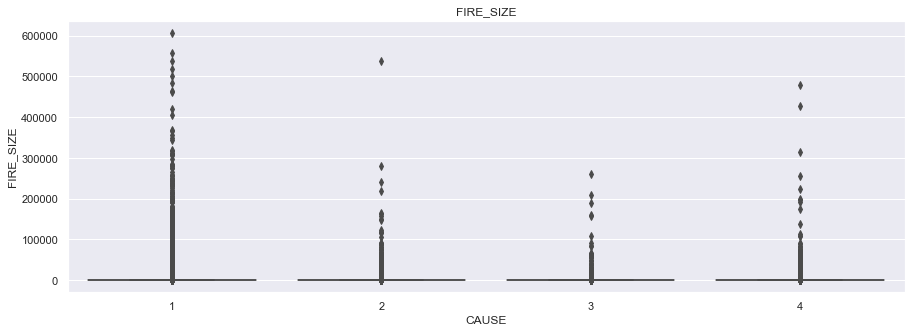

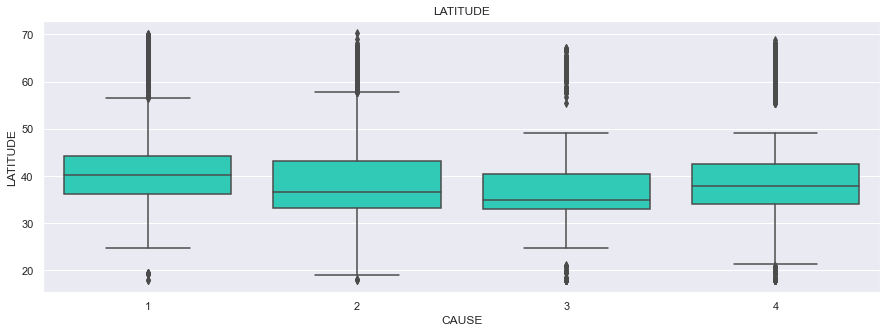

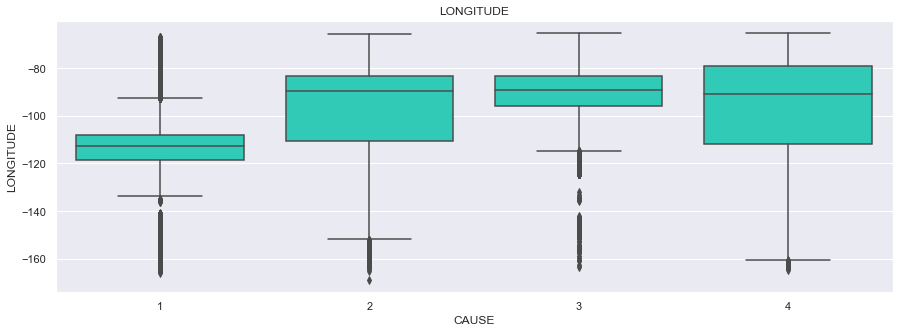

In [25]:
#En statistique, une valeur aberrante (ou outlier en anglais) est une observation qui est "distante" des autres valeurs de la même variable, c'est-à-dire qu'elle contraste grandement avec le reste des valeurs mesurées.
#Une valeur aberrante peut être due à une variabilité inhérente au phénomène observé ou peut aussi indiquer une erreur expérimentale.
#C'est pourquoi elles sont parfois exclues des données.

Col = ['DISCOVERY_DAY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE']

for i in Col:
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    sns.boxplot(y=fires_model[i], x=fires_model['CAUSE'], ax=axs, color='#16E4CA')
    plt.title(i)

In [26]:
print('LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données')

print('DISCOVERY_DAY: cela reste entre 0 et 365 jours, donc c est cohérent')
print('\n')
print('Par contre on voit des outlier marquants sur DURATION et FIRE_SIZE')
      
print('Quantité outliers FIRE_SIZE:' , fires_model['FIRE_SIZE'][fires_model['FIRE_SIZE']>400000].shape, 'vs', fires_model['FIRE_SIZE'].shape, 'en total')


LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données
DISCOVERY_DAY: cela reste entre 0 et 365 jours, donc c est cohérent


Par contre on voit des outlier marquants sur DURATION et FIRE_SIZE
Quantité outliers FIRE_SIZE: (13,) vs (988934,) en total


In [27]:
#supression outliers FIRE_SIZE

fires_model = fires_model[fires_model['FIRE_SIZE']<400000]

fires_model.shape

(988921, 12)

In [28]:
fires_model = fires_model.dropna()

# PCA

In [29]:
# Import des packages
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [30]:
# Séparation des données d'entrainement et des données cibles
data = fires_model.drop(['CAUSE'], axis=1)
target = fires_model['CAUSE']

In [31]:
# Création instance StandardScaler
scaler = StandardScaler()
# Normalisation des données
norm = scaler.fit_transform(data)

# Création de l'instance PCA
model_pca = PCA()

# Stockage de la représentation de data normalisée obtenue par Analyse en Composantes Principales dans un array nommé coord_acp
coord_acp = model_pca.fit_transform(norm)

In [32]:
# Part de variance expliquée pour chaque composante
var_expl = model_pca.explained_variance_
print(var_expl)

[2.36083196e+00 1.37685380e+00 1.19606385e+00 1.12415942e+00
 1.00956531e+00 9.95909912e-01 9.91938219e-01 7.92600939e-01
 7.40496850e-01 4.11556068e-01 3.48031261e-05]


In [33]:
# Dimension de la variance expliquée
var_expl.shape

(11,)

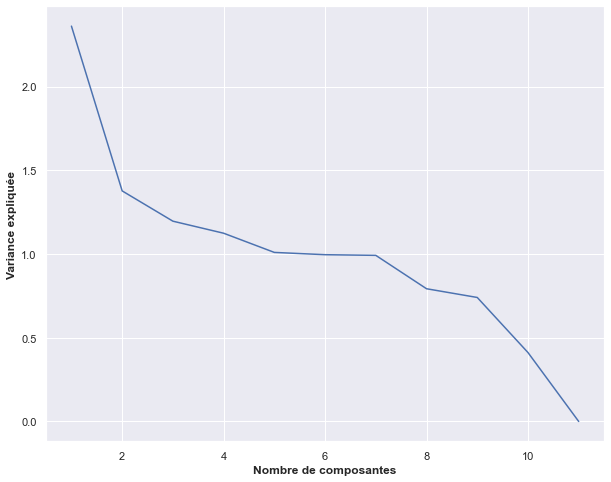

In [37]:
# Graphique de la variance expliquée en fonction du nombre de facteurs
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,12), var_expl)
plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('Variance expliquée', weight='bold') # Valeurs propres
plt.show()

In [38]:
# Ratio de la variance expliquée pour chacune des composantes
ratio_var = model_pca.explained_variance_ratio_ 
ratio_var

array([2.14620870e-01, 1.25168401e-01, 1.08732967e-01, 1.02196208e-01,
       9.17785714e-02, 9.05371731e-02, 9.01761105e-02, 7.20545580e-02,
       6.73178274e-02, 3.74141501e-02, 3.16391735e-06])

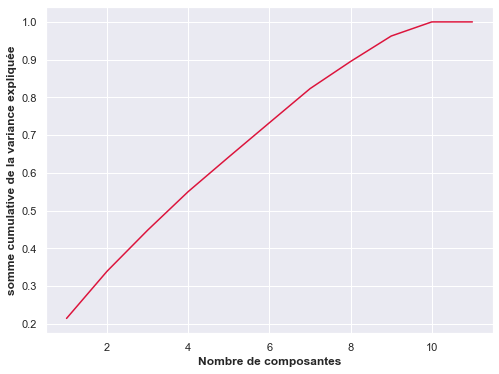

In [39]:
# Graphique de la somme cumulative représentant le ratio de la variance expliquée en fonction du nombre de composantes
plt.figure(figsize=(8,6))

plt.plot(np.arange(1, 12), np.cumsum(ratio_var), color = 'crimson')

plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('somme cumulative de la variance expliquée', weight='bold')

plt.show()

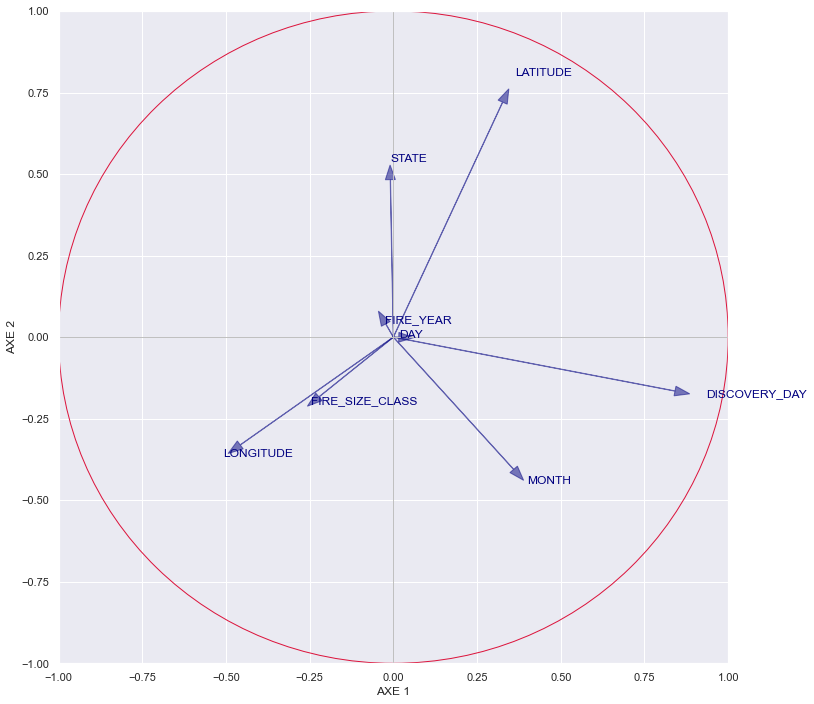

In [41]:
sqrt_eigval = np.sqrt(model_pca.explained_variance_)
corvar = np.zeros((11, 11))
for k in range(11):
    corvar[:, k] = model_pca.components_[k, :] * sqrt_eigval[k]
# corvar

fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables)
for j in range(8):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='navy')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9, alpha=0.5, head_width=0.03, color='navy')

# ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 1, color='crimson', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()

In [43]:
# Création d'un dataframe avec uniquement les 2 premières coordonnées de PCA
acp_data = pd.DataFrame({'axe1':coord_acp[:,0], 'axe2':coord_acp[:,1], 'target':target})

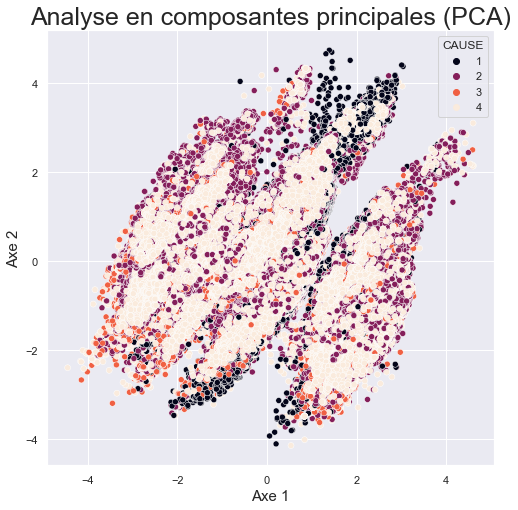

In [44]:
# Représentation graphique du nuage de points
plt.figure(figsize=(8,8))

sns.scatterplot(x='axe1', y='axe2', hue= target, data=acp_data, palette='rocket')

plt.title('Analyse en composantes principales (PCA)', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

# T-SNE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# L'objectif de T-SNE est similaire à celui de l'ACP : représenter nos données dans une dimension plus petite.
# Cependant, le principe de T-SNE est différent :
# Il construit une nouvelle représentation des données de manière à ce que les données proches dans la dimension d'origine aient une forte probabilité d'avoir des représentations proches dans la nouvelle dimension.

from sklearn.manifold import TSNE

In [46]:
# Création de l'instance T-SNE
tsne = TSNE(n_components=2)

# Import de la fonction random pour pouvoir sélectionner aléatoirement 100000 données du dataset normalisé
import random
norm_aleatoire = random.choices(norm, k=100000)
# Stockage de la représentation de data normalisée avec 10% des données intiales aléatoires afin de ne pas trop bloquer le lancement
# Pour mémoire : time 12 à 24min.
Coord_TSNE = tsne.fit_transform(norm_aleatoire)


c:\Users\Enedis\Projets\Projet_DA_WILDFIRE\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Enedis\Projets\Projet_DA_WILDFIRE\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [47]:
# DataFrame tsne_df contenant les coordonnées Coord_TSNE ainsi que la variable target avec 10% des données initiales.

tsne_df = pd.DataFrame({'AXE 1': Coord_TSNE[:, 0], 'AXE 2': Coord_TSNE[:, 1], 'Target': target[100000]})

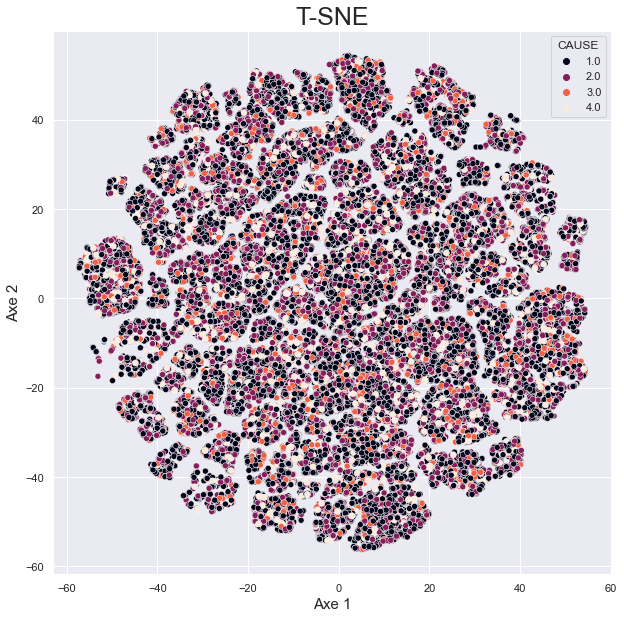

In [48]:
# Représentation graphique de 10% des données

plt.figure(figsize=(10,10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_df, palette='rocket')

plt.title('T-SNE', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

### T-SNE + PCA